In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [2]:
# Load the dataset
heart_file_path = "heart.csv"  # Ensure the file is in the working directory
df = pd.read_csv(heart_file_path)

In [3]:
# Display the first five rows of the dataset
display(df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


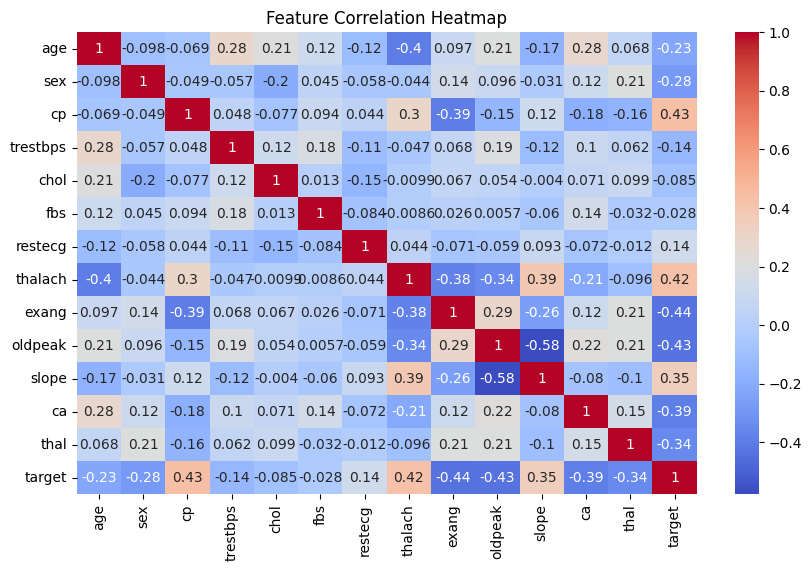

In [4]:

# Data Visualization
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [5]:

# Splitting dataset into features (X) and target (y)
X = df.drop(columns=['target'])
y = df['target']


In [6]:
# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
# Defining models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

In [9]:
# Training and evaluating models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.8525
K-Nearest Neighbors Accuracy: 0.9180
Support Vector Machine Accuracy: 0.8689
Gaussian Naive Bayes Accuracy: 0.8689
Decision Tree Accuracy: 0.8361
Random Forest Accuracy: 0.8689
Gradient Boosting Accuracy: 0.7869
AdaBoost Accuracy: 0.8197


In [10]:
# Sorting results
sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))

C:\Users\HP\AppData\Local\Temp\ipykernel_16048\1929850174.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sorted_results.keys()), y=list(sorted_results.values()), palette='viridis')


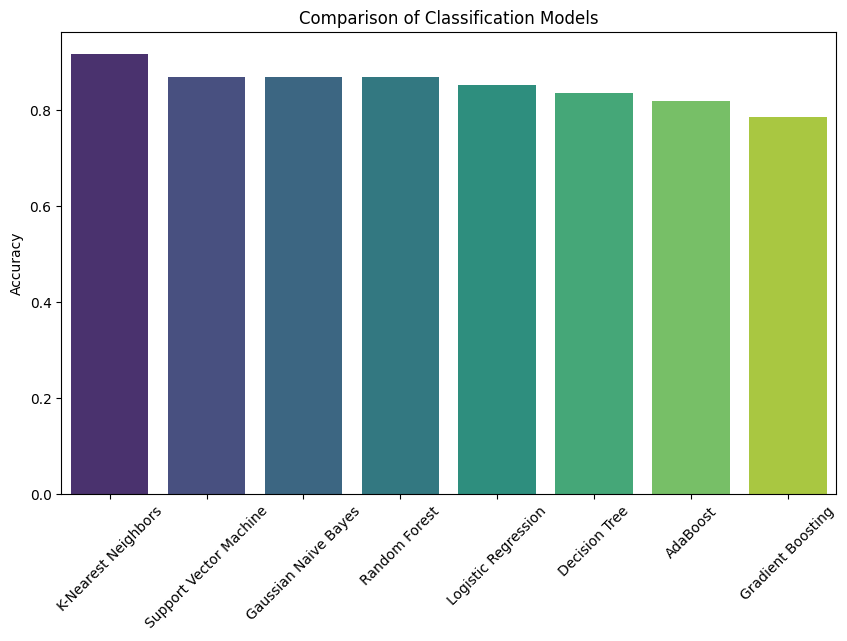

In [11]:
# Plotting model comparison
plt.figure(figsize=(10,6))
sns.barplot(x=list(sorted_results.keys()), y=list(sorted_results.values()), palette='viridis')
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Comparison of Classification Models")
plt.show()

In [ ]:
# Exporting predictions using the best model (Random Forest in this case)
best_model = RandomForestClassifier(n_estimators=100)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)
predictions_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_best})
predictions_df.to_csv("heart_disease_predictions.csv", index=False)